<a href="https://colab.research.google.com/github/teddcp/MAchine-Learning-on-KAGGLE/blob/master/Regression_Automobile_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question
------------------------------------------------------

Use **Automobile price data Raw csv** file : 

1.	Split data 80% to train 20% for test
2. 	predict price for 20% test data
3. 	Determine R-Squared value

This is from **Kaggle** .

Dataset link : [Automobile.csv](https://www.kaggle.com/toramky/automobile-dataset/kernels)

In [0]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [314]:
data=pd.read_excel('/content/automobile-data.xlsx')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [316]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## Separating the numerical and categorical columns
-----------------------------------------------------------

In [317]:
categorical_cols=data.select_dtypes(include='O').columns.to_list()
numeric_cols=data.select_dtypes(exclude='O').columns.to_list()
numeric_cols

['symboling',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'city-mpg',
 'highway-mpg']

In [318]:
categorical_cols

['normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

## Checking for missing values

In [319]:
data.replace('?',np.NaN,inplace=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [320]:
round(data.isna().sum()/len(data),2)

symboling            0.00
normalized-losses    0.20
make                 0.00
fuel-type            0.00
aspiration           0.00
num-of-doors         0.01
body-style           0.00
drive-wheels         0.00
engine-location      0.00
wheel-base           0.00
length               0.00
width                0.00
height               0.00
curb-weight          0.00
engine-type          0.00
num-of-cylinders     0.00
engine-size          0.00
fuel-system          0.00
bore                 0.02
stroke               0.02
compression-ratio    0.00
horsepower           0.01
peak-rpm             0.01
city-mpg             0.00
highway-mpg          0.00
price                0.02
dtype: float64

In [0]:
counts=data.make.value_counts().to_frame().to_dict()['make']
data.make=data.make.map(lambda x: 'others' if counts[x]<6 else x)

In [0]:
counts=data['num-of-cylinders'].value_counts().to_frame().to_dict()['num-of-cylinders']
data['num-of-cylinders']=data['num-of-cylinders'].map(lambda x: 'others' if counts[x]<6 else x)

In [0]:
counts=data['fuel-system'].value_counts().to_frame().to_dict()['fuel-system']
data['fuel-system']=data['fuel-system'].map(lambda x: 'others' if counts[x]<6 else x)

In [324]:
data['fuel-system'].value_counts()

mpfi      94
2bbl      66
idi       20
1bbl      11
spdi       9
others     5
Name: fuel-system, dtype: int64

In [0]:
#dropping Normalized losses
data.drop('normalized-losses', axis=1, inplace=True)
categorical_cols.remove('normalized-losses')

## Converting data types

In [0]:
for i in ['bore', 'horsepower', 'stroke', 'peak-rpm', 'price']:
    data[i] = data[i].astype('float64')
    numeric_cols.append(i)
    categorical_cols.remove(i)

numeric_cols.remove('price')

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       203 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [328]:
categorical_cols,numeric_cols

(['make',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'body-style',
  'drive-wheels',
  'engine-location',
  'engine-type',
  'num-of-cylinders',
  'fuel-system'],
 ['symboling',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'engine-size',
  'compression-ratio',
  'city-mpg',
  'highway-mpg',
  'bore',
  'horsepower',
  'stroke',
  'peak-rpm'])

## Note 

Till now the columns on which missing values are still present  :

1. Numeric columns - bore,stroke,hp,peak-rpm,price
2. categorical columns - num_of_doors only

## Visualizing the data
------------------------------------------------------------------

In [329]:
len(numeric_cols)

14

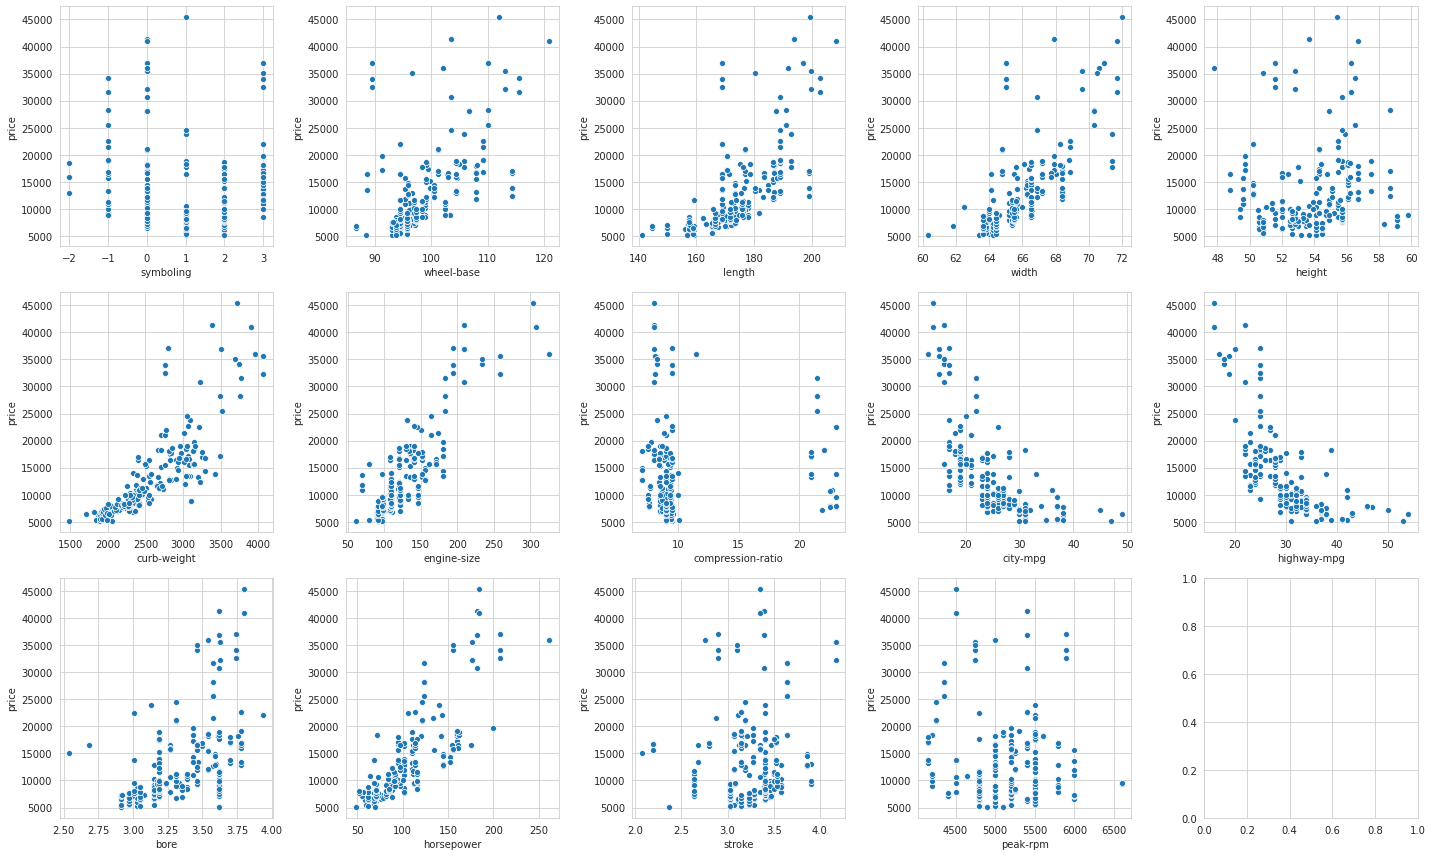

In [330]:
fig,arr= plt.subplots(3,5,figsize=(20,12))
k=1

for col in numeric_cols :
  plt.subplot(3,5,k)
  sns.scatterplot(x=col,y='price',data=data)
  fig.tight_layout()
  k+=1

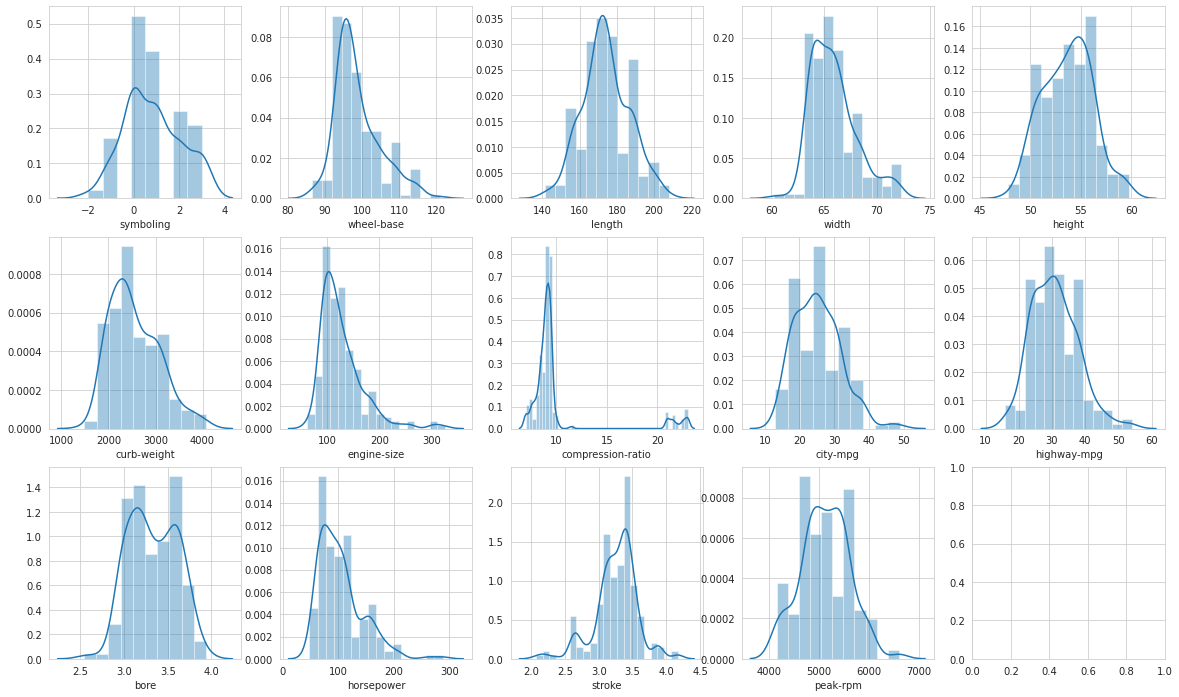

In [331]:
fig,arr= plt.subplots(3,5,figsize=(20,12))
k=1

for col in numeric_cols :
  plt.subplot(3,5,k)
  sns.distplot(data[col])
  k+=1

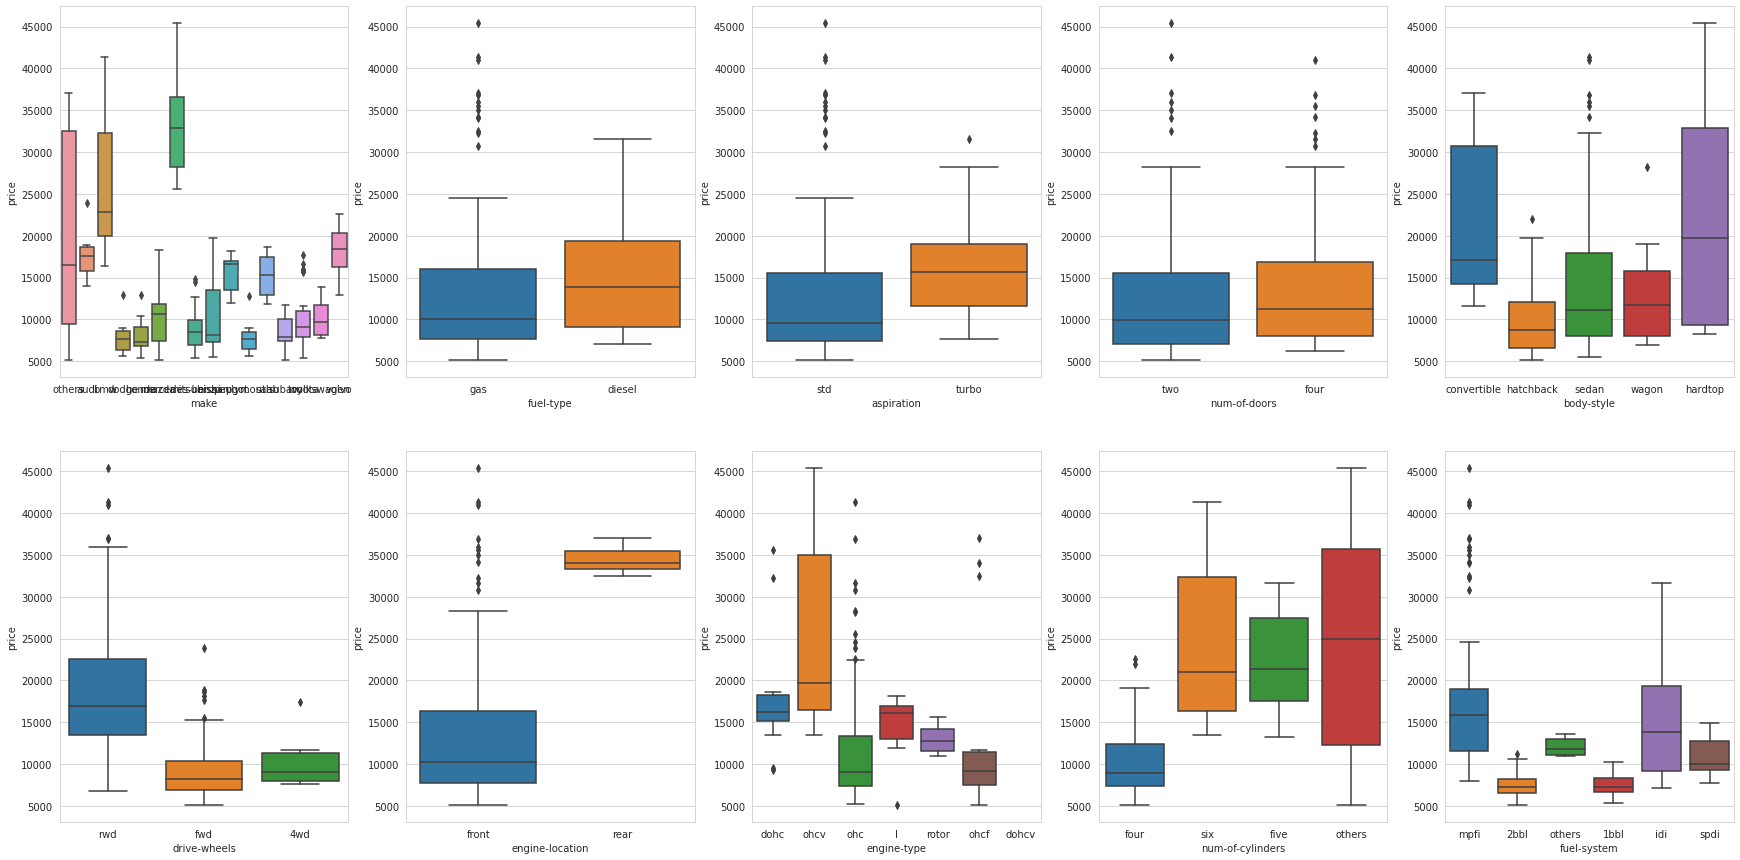

In [332]:
fig,arr= plt.subplots(2,5,figsize=(30,15))
k=1

for col in categorical_cols :
  plt.subplot(2,5,k)
  sns.boxplot(x=col,y='price',data=data)
  k+=1

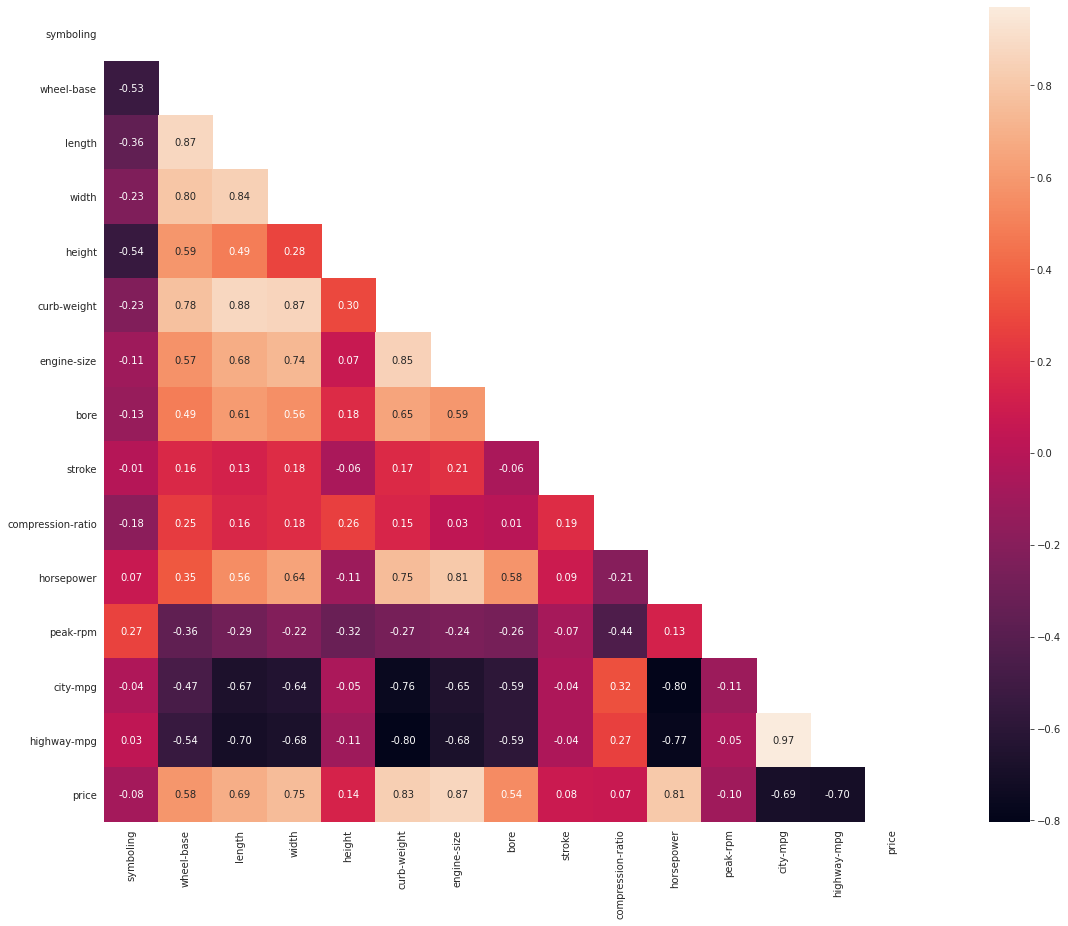

In [333]:
plt.figure(figsize=(25,15))
mask=np.triu(data.corr())
sns.heatmap(data.corr(),annot=True,fmt='.2f',square=True,mask=mask)

## Dropping the columns

In [334]:
data = data.drop(['height', 'stroke', 'compression-ratio', 'peak-rpm', 'symboling'], axis=1)
data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,others,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111.0,21,27,13495.0
1,others,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111.0,21,27,16500.0
2,others,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115.0,18,22,17450.0


In [335]:
data.price.fillna(data.price.mean(),axis=0,inplace=True)
data.price.isna().sum()

0

In [336]:
# removing those name from the list num_cols
for i in ['height', 'stroke', 'compression-ratio', 'peak-rpm','symboling']:
    numeric_cols.remove(i)

numeric_cols

['wheel-base',
 'length',
 'width',
 'curb-weight',
 'engine-size',
 'city-mpg',
 'highway-mpg',
 'bore',
 'horsepower']

## Splitting data for training and testing

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
x_train,x_test,y_train,y_test = tts(data.iloc[:,:-1],data.iloc[:,-1],random_state=42,test_size=0.35)

## Applying linear Regression

In [0]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.pipeline import make_pipeline as mp
from sklearn.preprocessing  import OneHotEncoder as ohe
from sklearn.impute import SimpleImputer as si
from sklearn.compose import ColumnTransformer as ct
from sklearn.preprocessing import StandardScaler as sc

In [340]:
data.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'horsepower', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

In [341]:
numeric_cols,categorical_cols

(['wheel-base',
  'length',
  'width',
  'curb-weight',
  'engine-size',
  'city-mpg',
  'highway-mpg',
  'bore',
  'horsepower'],
 ['make',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'body-style',
  'drive-wheels',
  'engine-location',
  'engine-type',
  'num-of-cylinders',
  'fuel-system'])

In [0]:
imp1 = si(missing_values=np.nan, strategy='mean')
imp2 = si(missing_values=np.nan, strategy='most_frequent')

numeric_transformer= mp(imp1,sc())
categorical_transformer=mp(imp2,ohe())

transformer=ct(transformers=[ ('num_trans',numeric_transformer,numeric_cols),
                             ('cat_trans',categorical_transformer,categorical_cols)
                            ],remainder='passthrough'
              )

In [0]:
model=mp(transformer,lr(fit_intercept=True))

In [344]:
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_trans',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                       

In [0]:
res=model.predict(x_test)

## Accuracy Evaluation

In [0]:
from sklearn.metrics import mean_squared_error as mse,r2_score as rs

In [351]:
np.sqrt(mse(y_test,res))

2991.623798213024

In [352]:
rs(y_test,res)   # 85% accuracy is achieved

0.858735939160401

## Conclusion 

we have achieved **85% accuracy** from linear Regression .

## Improving the Accuracy with RandomForestRegressor
-----------------------------------------------------------

In [0]:
from sklearn.ensemble import RandomForestRegressor as rf

In [0]:
imp1 = si(missing_values=np.nan, strategy='mean')
imp2 = si(missing_values=np.nan, strategy='most_frequent')

numeric_transformer= mp(imp1,sc())
categorical_transformer=mp(imp2,ohe())

transformer=ct(transformers=[ ('num_trans',numeric_transformer,numeric_cols),
                             ('cat_trans',categorical_transformer,categorical_cols)
                            ],remainder='passthrough'
              )

In [0]:
model=mp(transformer, rf())

In [358]:
model.fit(x_train, y_train)

pred = model.predict(x_test)

print(np.sqrt(mse(y_test,pred)))


2434.0744269439656
0.9064841049407717


In [360]:
print(f'Accuracy score is {round(rs(y_test, pred),2)}')

Accuracy score is 0.91


## Conclusion
----------------------

With **RandomForestRegressor**, we are able to **`achieve 91% accuracy `**

In [0]:
#ML Assignment 1-12.ipynb